<a href="https://colab.research.google.com/github/ABCutter/DDDS-My-Projects/blob/main/Project-1/Project_1_To_Do_List.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 – To Do List



## Problem Definition

1. Write a concise problem definition for the project. Put it in a text field at the top of your Jupyter notebook.



In [1]:
##Problem Definition
#Predict a binary target using 101 anonymized numeric features by applying the full data science process (Data Collection/Sources, Data Cleaning, Exploratory Data Analysis, Processing, Data Visualization/Communication of Results) to evaluate model performance.
#Problem type: Supervised, Classification, Categorical target.

## Data Collection

2. Load Pandas, Numpy, and Matplotlib.

1. Load data Train.csv from AWS S3.



In [2]:
## Data Collection
#The dataset was sourced from AWS S3 and includes 180,000+ rows with 101 anonymized numeric features and a binary target. No data interpolation was required.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
import plotly.express as px

from sklearn import datasets, metrics, model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

import scipy.stats as stats

import random

In [4]:
base_path = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/"
train_path = base_path + 'Transaction.train.big.csv'
test_path = base_path + 'Transaction.test.big.csv'


In [5]:
train_path

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv'

## Data Cleaning

4. Examine the data using tools we have used in class.

1. If there are data cleaning issues, develop recommendations for how to deal with them.



In [6]:
##Data Cleaning
#Initial data review revealed no missing values or duplicates, though a number of NaN entries were dropped. Histogram visualizations were used to observe distributions and identify potential outliers, informing exploratory analysis decisions.

In [7]:
train_orig = pd.read_csv(train_path)


In [8]:
#train_orig.head()
train_orig.tail()
#train_orig.shape

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049999,1049999,train_1049999,0.0,2.1828,12.3805,17.5654,NaN,8.1795,NaN,NaN,...,NaN,-12.1108,NaN,10.7608,NaN,NaN,NaN,NaN,NaN,14.1690


In [9]:
train = train_orig.copy()
train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
train['target'].value_counts(dropna=False)

,count
target,
NaN,870000
0.0,161960
1.0,18040


In [11]:
train.notna().sum().sum()

np.int64(11280000)

In [12]:
train.isna().sum()

,0
Unnamed: 0,0
ID_code,0
target,870000
var_0,870000
var_1,870000
...,...
var_96,1050000
var_97,1050000
var_98,1050000
var_99,1050000


In [13]:
train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 104 columns):
 #    Column      Dtype  
---   ------      -----  
 0    Unnamed: 0  int64  
 1    ID_code     object 
 2    target      float64
 3    var_0       float64
 4    var_1       float64
 5    var_2       float64
 6    var_3       float64
 7    var_4       float64
 8    var_5       float64
 9    var_6       float64
 10   var_7       float64
 11   var_8       float64
 12   var_9       float64
 13   var_10      float64
 14   var_11      float64
 15   var_12      float64
 16   var_13      float64
 17   var_14      float64
 18   var_15      float64
 19   var_16      float64
 20   var_17      float64
 21   var_18      float64
 22   var_19      float64
 23   var_20      float64
 24   var_21      float64
 25   var_22      float64
 26   var_23      float64
 27   var_24      float64
 28   var_25      float64
 29   var_26      float64
 30   var_27      float64
 31   var_28      float64
 3

In [14]:
train.dropna(thresh=1,axis=1,inplace=True) #drop columns with no non-nan values
train.head()


,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.476,21.6435,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
train.isna().sum()

,0
Unnamed: 0,0
ID_code,0
target,870000
var_0,870000
var_1,870000
var_2,870000
var_4,870000
var_7,870000
var_8,870000
var_14,870000


In [16]:
train.dropna(thresh=4,axis=0,inplace=True) #drop rows with <5 non-nan values
train.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,3,train_3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,5,train_5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,11,train_11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,15,train_15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,19,train_19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275


In [17]:
train.transpose().isnull().sum() #display the number of null values in each row of train

,0
3,0
5,0
11,0
15,0
19,0
...,...
1049990,0
1049993,0
1049995,0
1049997,0


In [18]:
train.transpose().isnull().sum().sum() #sum the number of null values in each row of train

np.int64(0)

In [19]:
#capture output of .describe
train_describe = train.describe(include='all')
#transpose and set var
train_t = train_describe.T

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180000 entries, 3 to 1049999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  float64
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_4       180000 non-null  float64
 7   var_7       180000 non-null  float64
 8   var_8       180000 non-null  float64
 9   var_14      180000 non-null  float64
 10  var_15      180000 non-null  float64
 11  var_17      180000 non-null  float64
 12  var_20      180000 non-null  float64
 13  var_21      180000 non-null  float64
 14  var_22      180000 non-null  float64
 15  var_24      180000 non-null  float64
 16  var_26      180000 non-null  float64
 17  var_27      180000 non-null  float64
 18  var_28      180000 non-null  float64
 19  var_29

In [21]:
train_test = train.copy()

In [22]:
train_test.drop(columns=['ID_code','Unnamed: 0'], inplace=True)
train_test.head()

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275


In [23]:
train_test.describe(include='all')

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,0.100222,7.440715,15.870166,12.735619,-0.668334,1.190419,6.813431,11.946357,2.963064,8.52808,...,11.434945,3.990847,7.566953,12.756574,10.342814,1.927078,-0.746871,-3.294620,-6.727860,14.224538
std,0.300297,3.021636,3.010492,4.185923,5.968300,5.169343,0.375564,7.364523,0.369891,4.64170,...,0.541385,0.198989,1.235043,9.320939,2.520602,1.476777,1.862151,7.418545,8.278554,0.171058
min,0.000000,-2.691700,6.299300,-1.018500,-22.748700,-15.194000,5.359300,-19.544300,1.851200,-6.01110,...,9.816900,3.320500,3.970500,-18.489700,0.427400,-3.814500,-7.280600,-29.984000,-35.211700,13.729000
25%,0.000000,5.160325,13.830400,9.664675,-4.997500,-2.571400,6.544100,6.756875,2.698400,5.06575,...,11.032400,3.853700,6.618800,5.661300,8.646700,0.890000,-2.105300,-8.757925,-12.835875,14.098900
50%,0.000000,7.350950,15.934600,12.670700,-0.560300,1.194600,6.806800,11.925300,2.959900,8.59920,...,11.435500,3.996000,7.628500,12.520300,10.395800,1.899700,-0.772000,-3.170950,-6.615100,14.226800
75%,0.000000,9.511125,18.061425,15.837300,3.632525,5.090450,7.070900,17.039600,3.241425,12.27330,...,11.845000,4.131625,8.583800,19.461725,12.116300,2.947225,0.526925,2.043350,-0.885250,14.361800
max,1.000000,16.716500,26.079100,26.997600,18.855400,18.471400,8.309100,39.396800,4.220400,22.33150,...,13.287800,4.752800,11.150600,44.363400,20.437300,8.402400,4.993900,21.236400,18.105600,14.743000


In [24]:
train_test['target'].value_counts(dropna=False)

,count
target,
0.0,161960
1.0,18040


In [25]:
#9. NOTE: the ‘target’ column indicates a successful transaction (‘1’) or a no-transaction (‘0’). Verify these are the only values in that column.
train_untarget = train_test.drop(columns=['target'])

In [26]:
has_nan = train_test.isna().any().any()
print(has_nan)

False


## Exploratory Data Analysis

6. Produce some visual analysis of the data – like plots showing the distributions of all variables. Recall that Gaussian Naive Bayes assumes the predictors are normally distributed. Note: you might have to do multiple plots in groups.

1. NOTE: the ‘target’ column indicates a successful transaction (‘1’) or a no-transaction (‘0’). Verify these are the only values in that column.

1. Check the correlation values between all **predictor columns** to ensure there are no substantial correlations between predictors. This is important to support the decision to classify the ‘target’ using Naïve Bayes.

1. Create two data frames: one with all successful transactions, one with all unsuccessful transactions. **Make sure they are copies and not slices**.





In [27]:
##Exploratory Data Analysis
#Correlation heatmaps and distribution plots were used to explore feature relationships and identify patterns to guide data processing. Most variables showed weak individual correlation with the target, but enough signal was present to proceed with modeling.

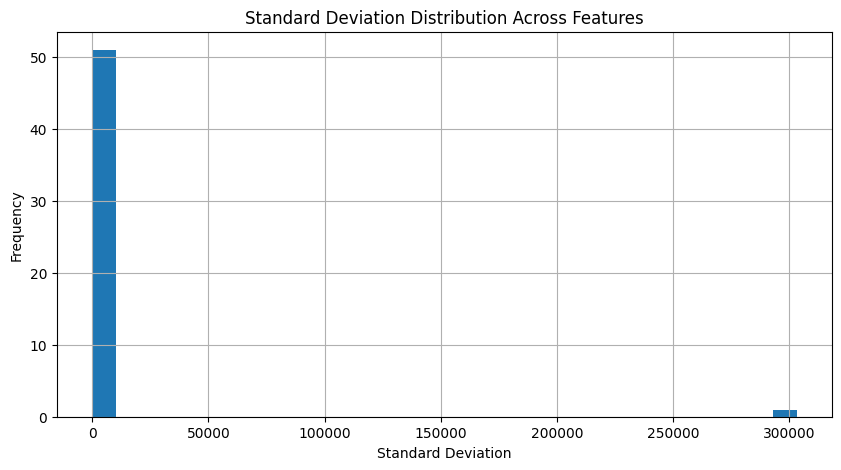

In [28]:
#Review Revise
train_t['std'].hist(bins=30, figsize=(10, 5))
plt.title("Standard Deviation Distribution Across Features")
plt.xlabel("Standard Deviation")
plt.ylabel("Frequency")
plt.show()

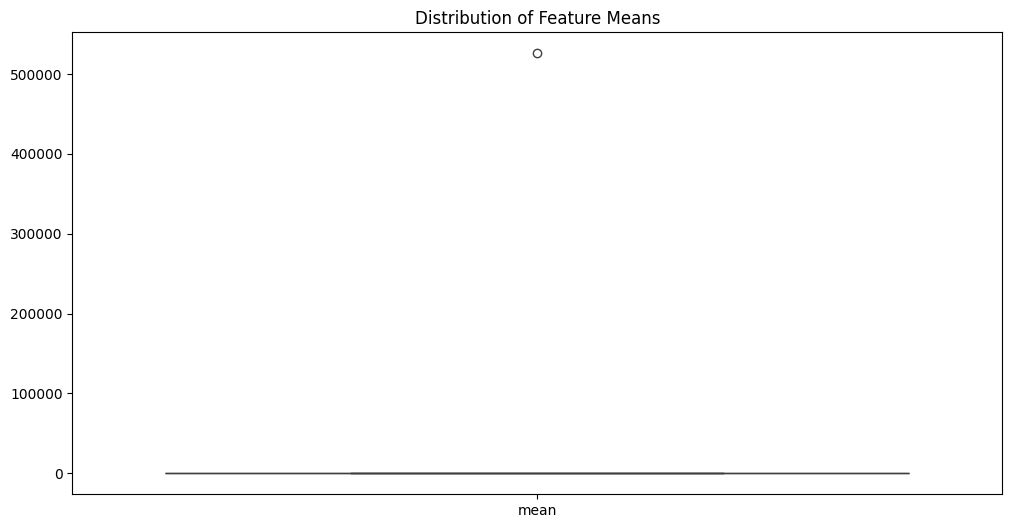

In [29]:
#Review, revise
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_t[['mean']])
plt.title("Distribution of Feature Means")
plt.show()

array([[<Axes: title={'center': 'var_0'}>,
        <Axes: title={'center': 'var_1'}>,
        <Axes: title={'center': 'var_2'}>,
        <Axes: title={'center': 'var_4'}>,
        <Axes: title={'center': 'var_7'}>,
        <Axes: title={'center': 'var_8'}>,
        <Axes: title={'center': 'var_14'}>],
       [<Axes: title={'center': 'var_15'}>,
        <Axes: title={'center': 'var_17'}>,
        <Axes: title={'center': 'var_20'}>,
        <Axes: title={'center': 'var_21'}>,
        <Axes: title={'center': 'var_22'}>,
        <Axes: title={'center': 'var_24'}>,
        <Axes: title={'center': 'var_26'}>],
       [<Axes: title={'center': 'var_27'}>,
        <Axes: title={'center': 'var_28'}>,
        <Axes: title={'center': 'var_29'}>,
        <Axes: title={'center': 'var_36'}>,
        <Axes: title={'center': 'var_37'}>,
        <Axes: title={'center': 'var_38'}>,
        <Axes: title={'center': 'var_39'}>],
       [<Axes: title={'center': 'var_41'}>,
        <Axes: title={'center': 'va

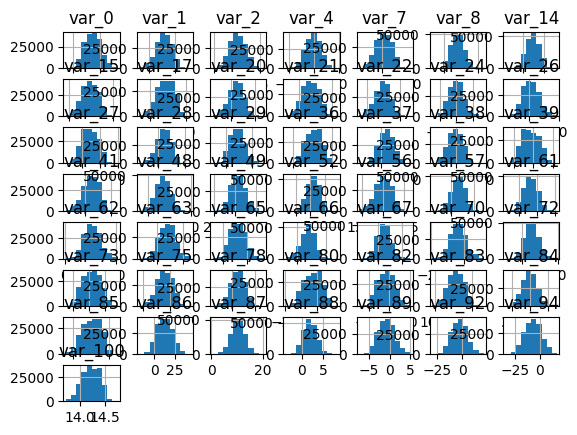

In [30]:
train_untarget.hist()

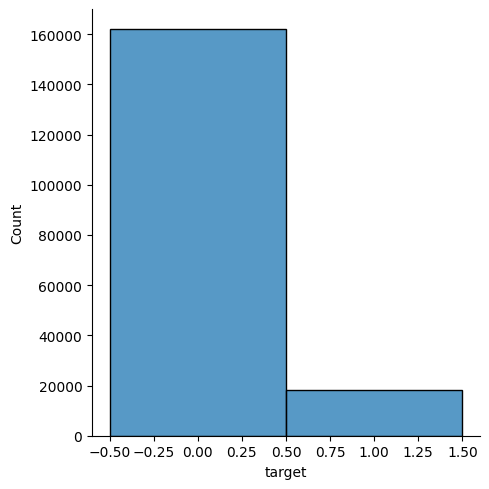

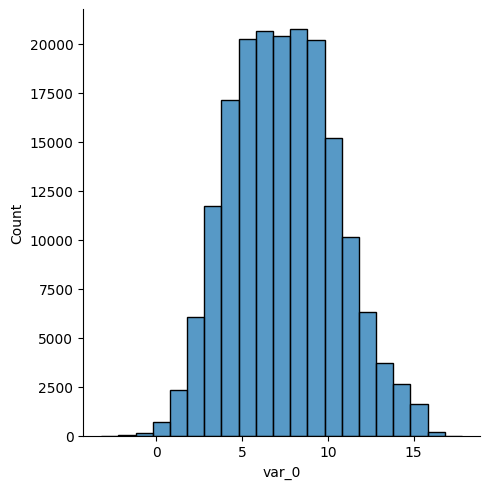

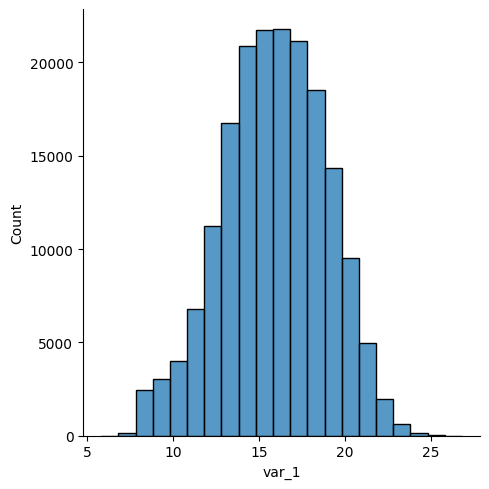

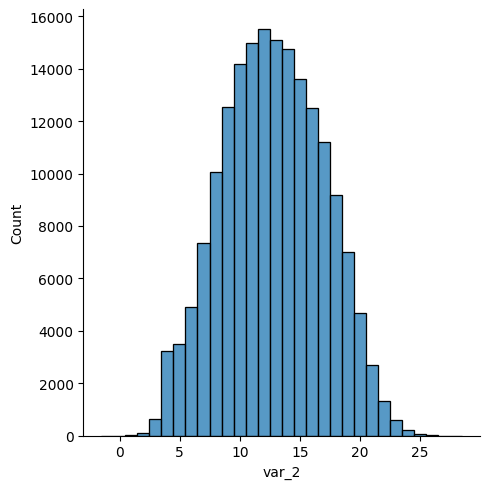

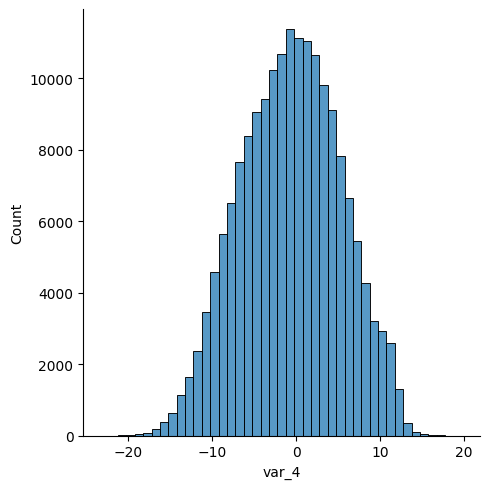

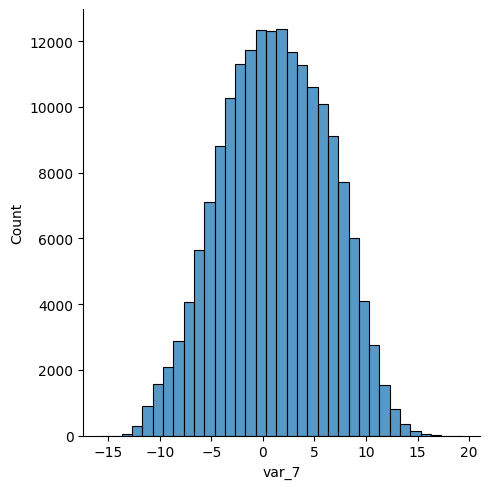

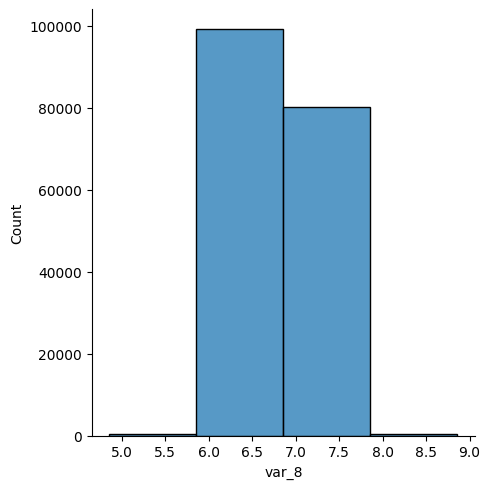

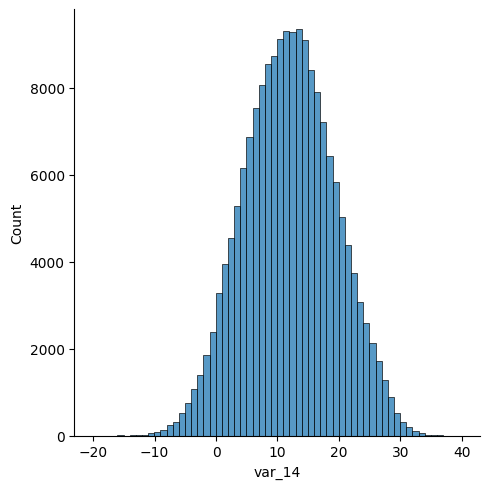

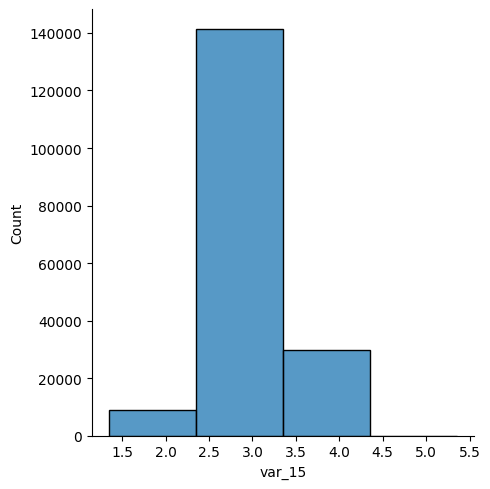

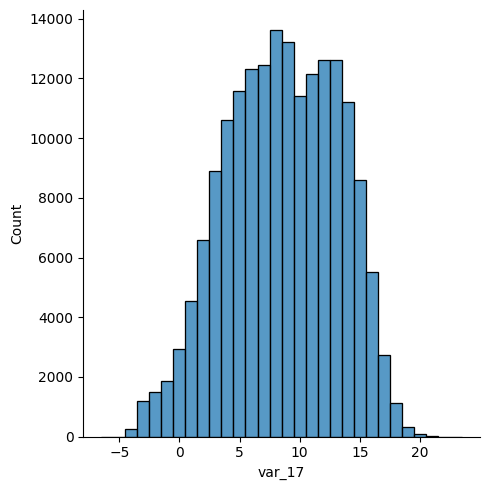

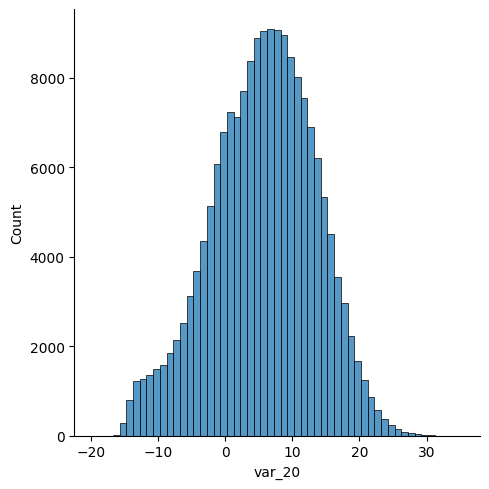

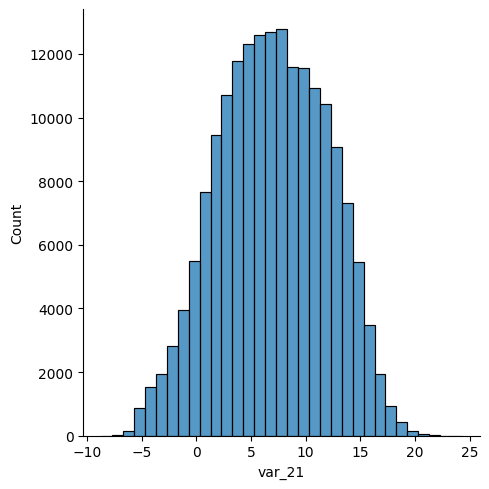

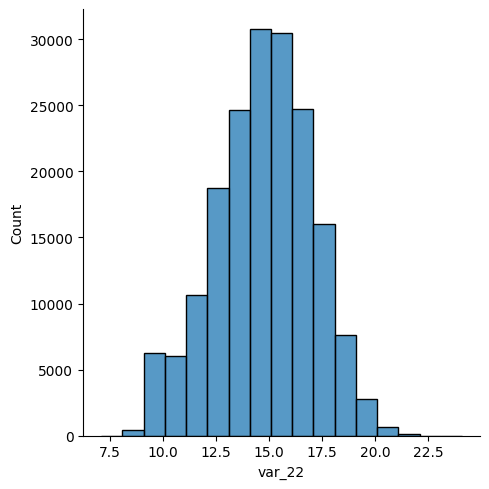

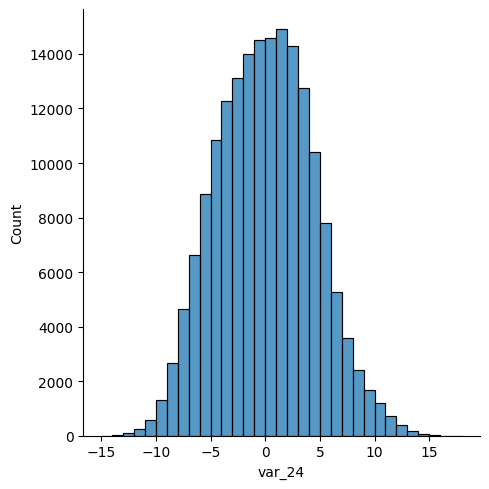

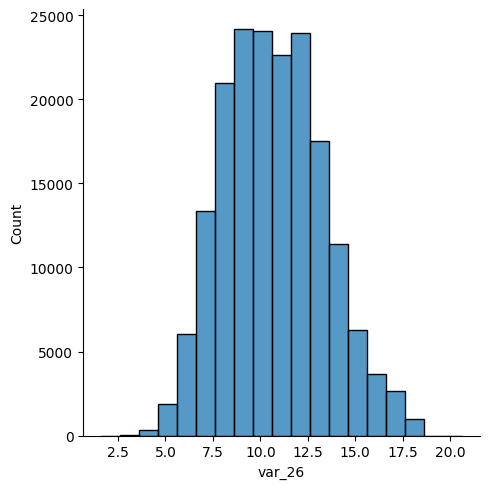

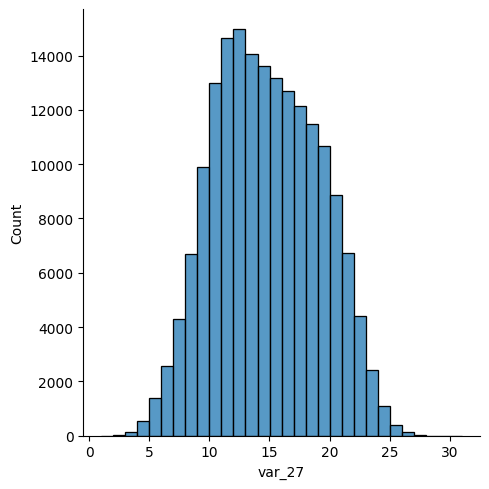

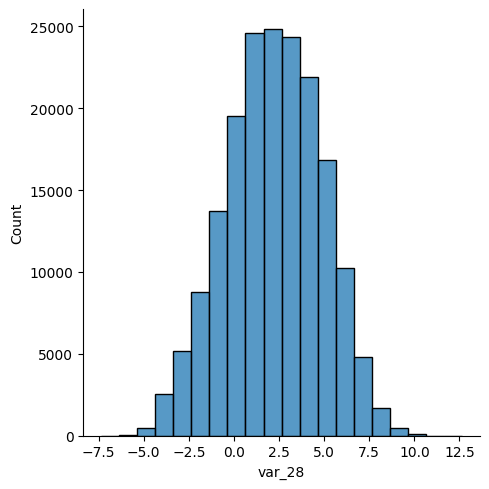

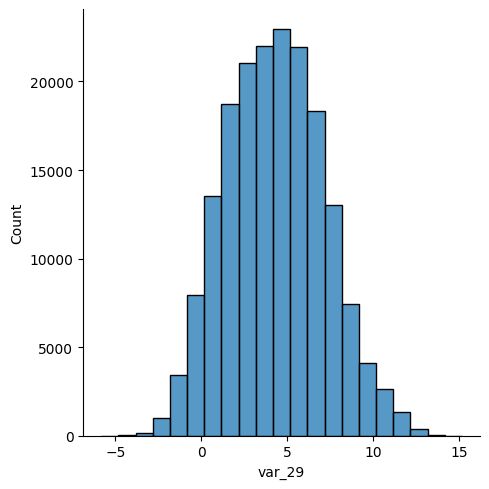

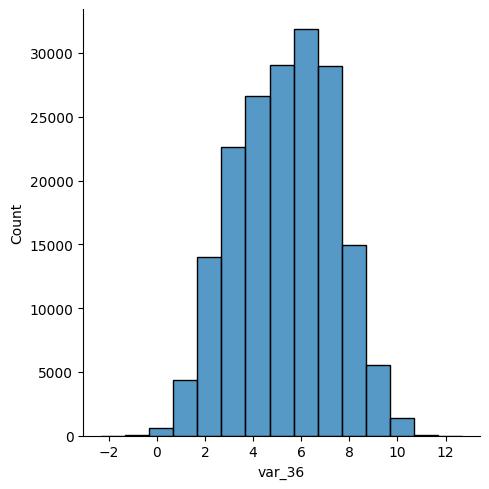

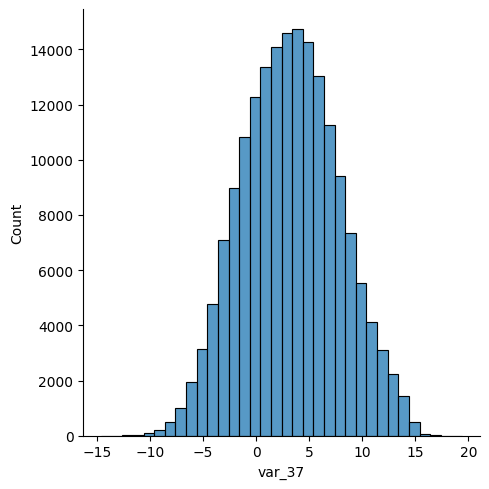

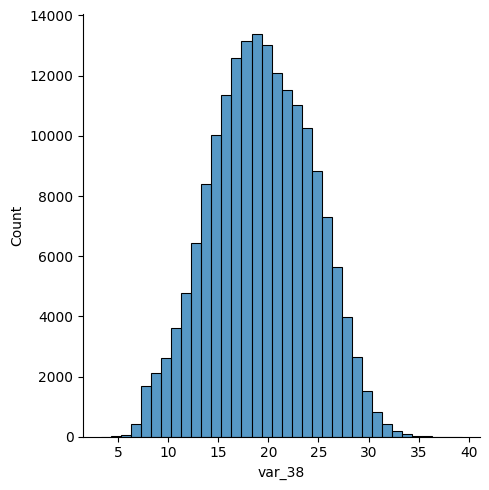

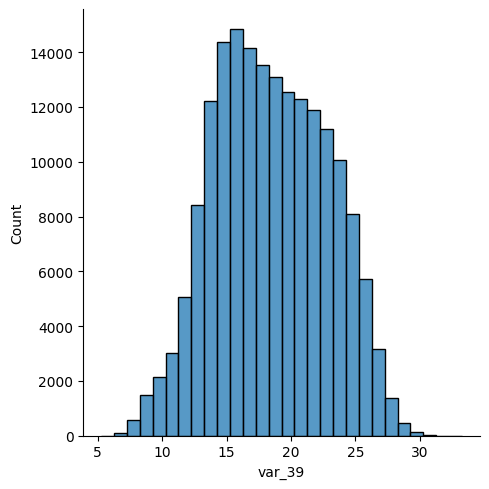

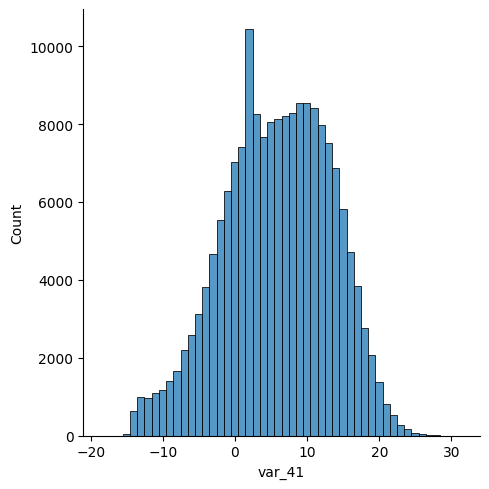

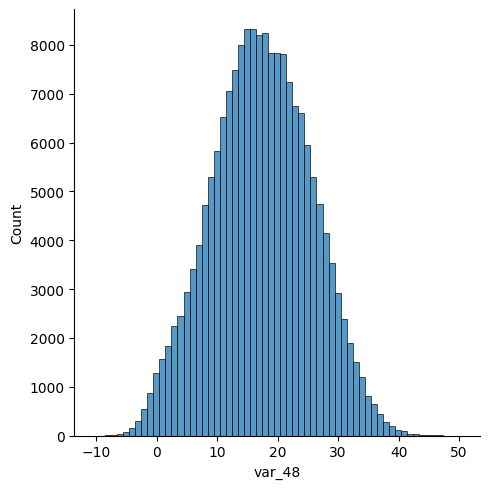

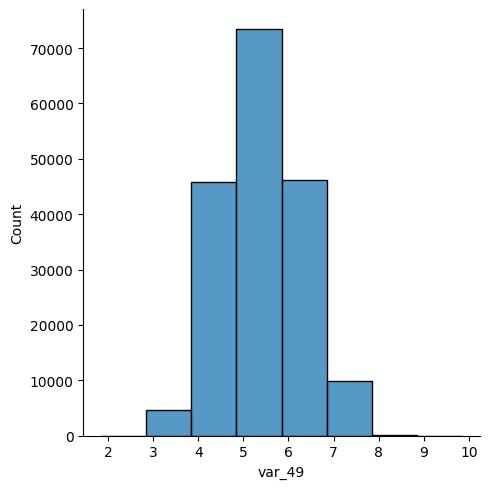

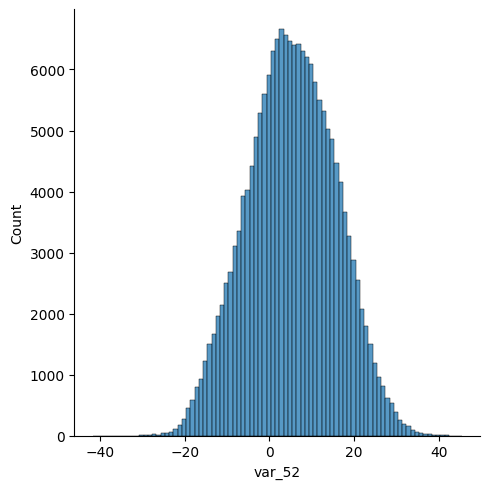

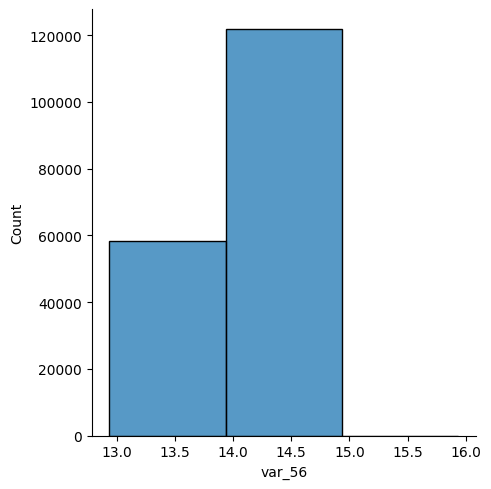

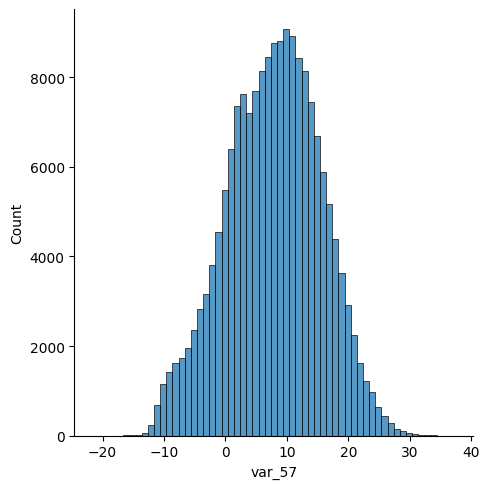

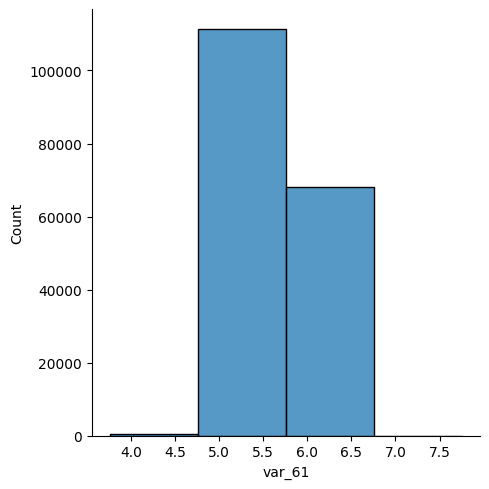

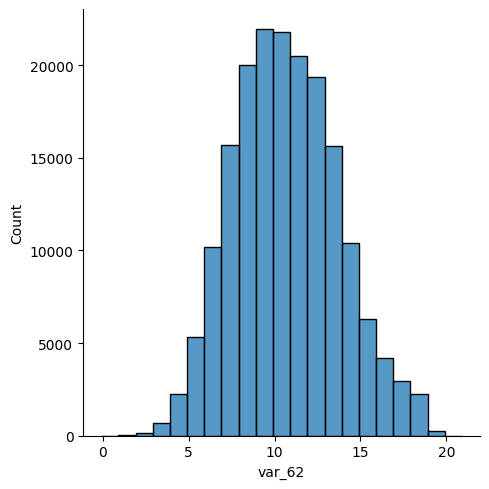

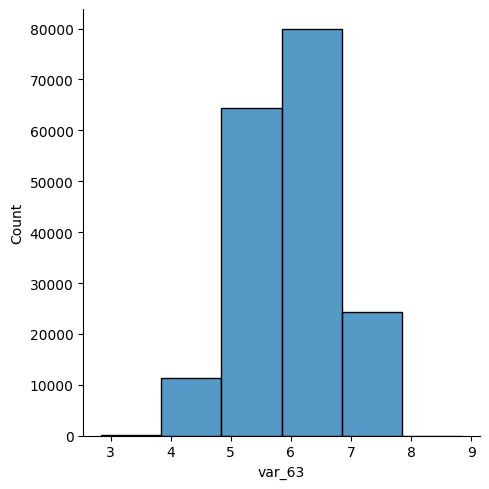

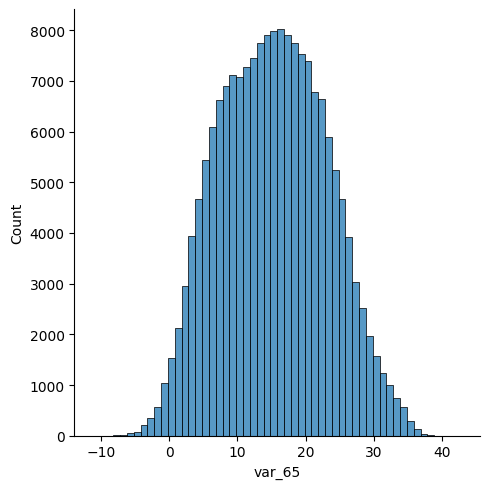

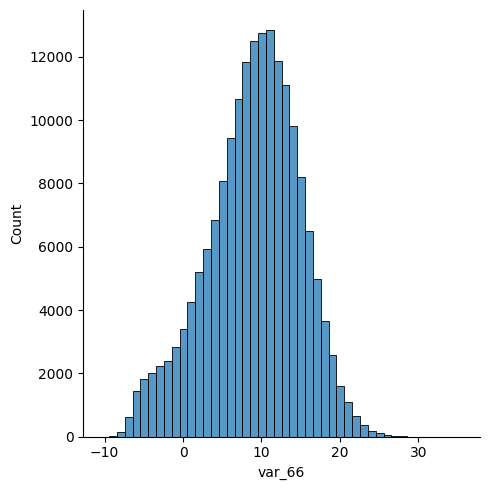

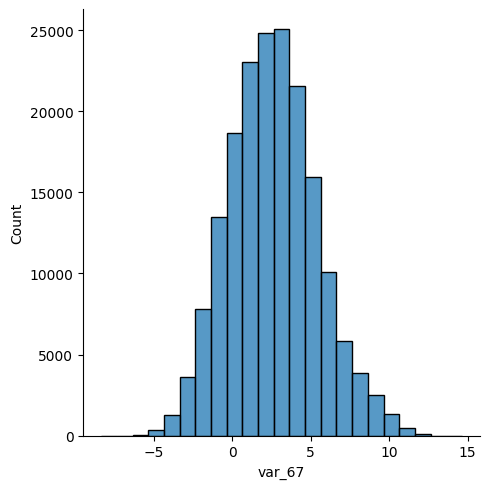

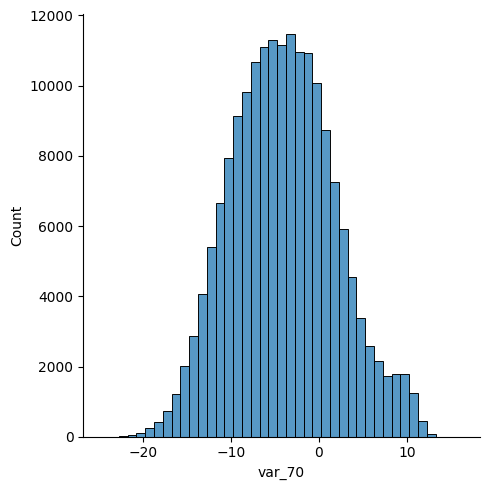

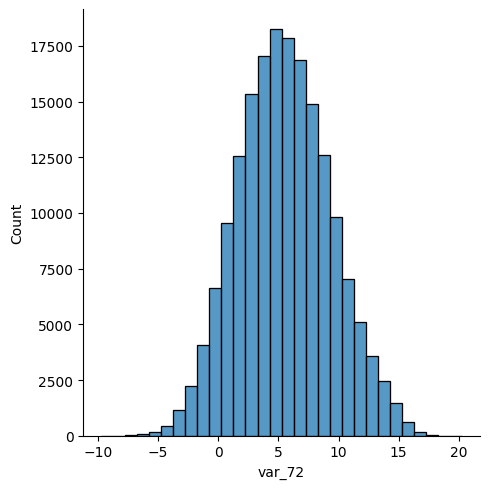

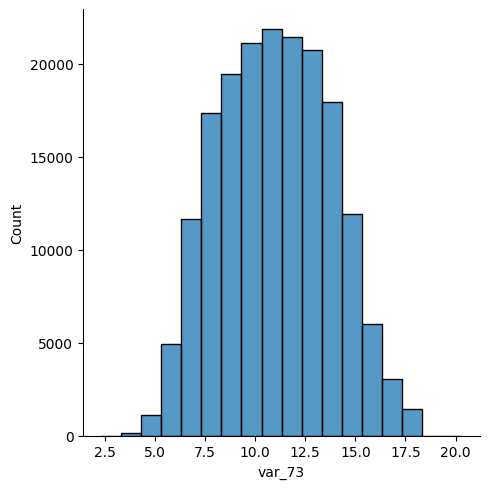

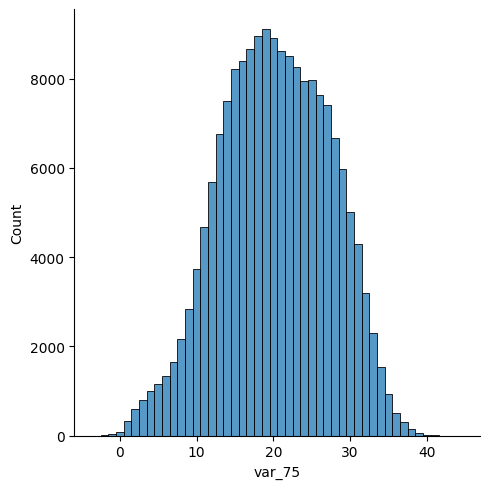

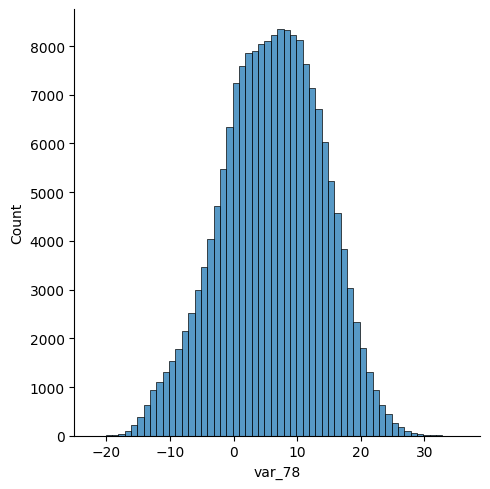

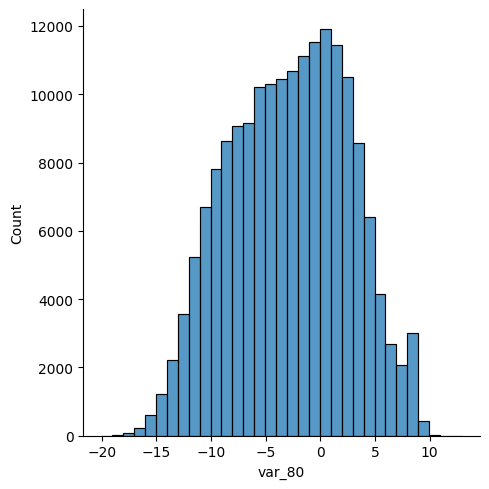

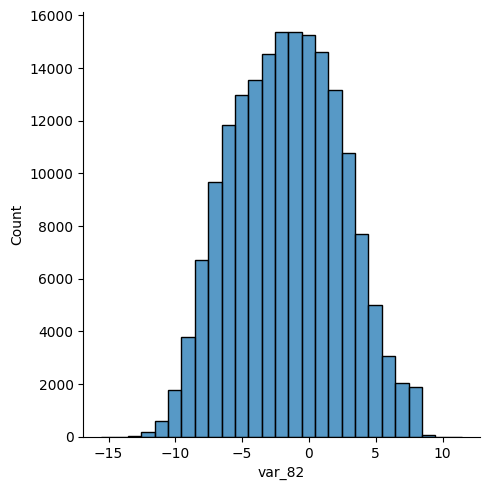

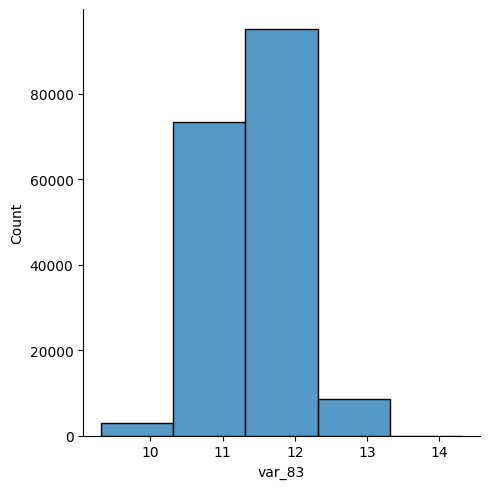

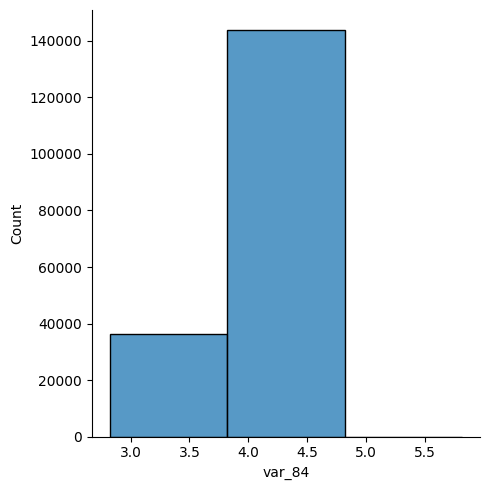

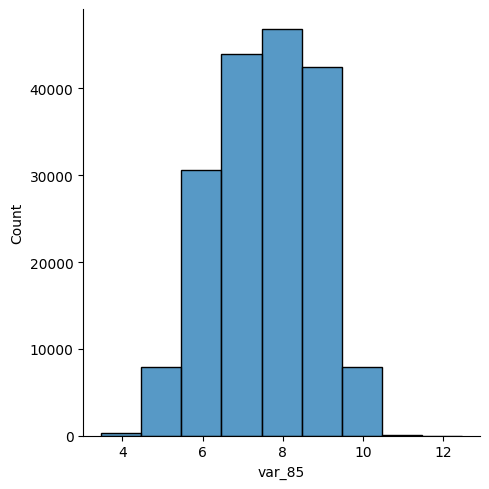

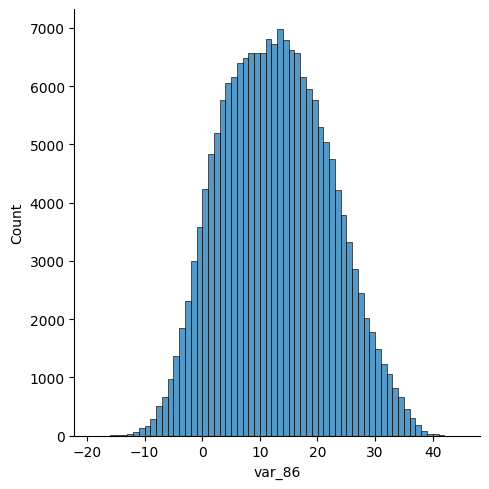

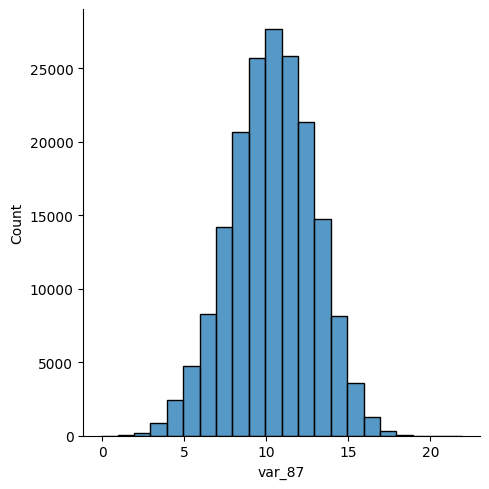

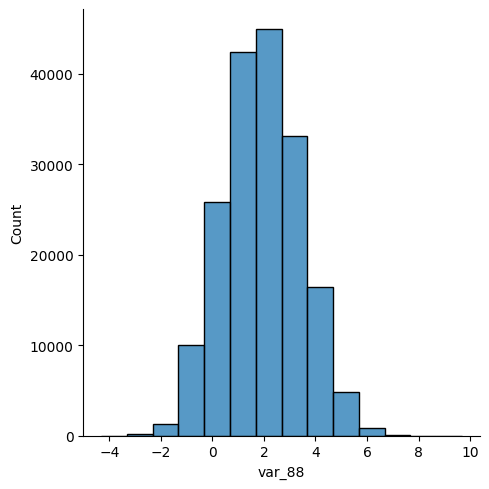

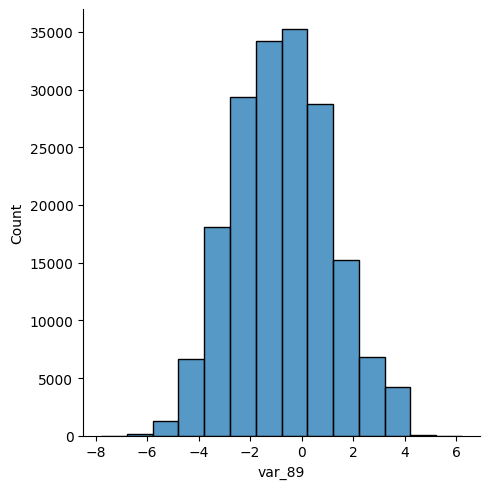

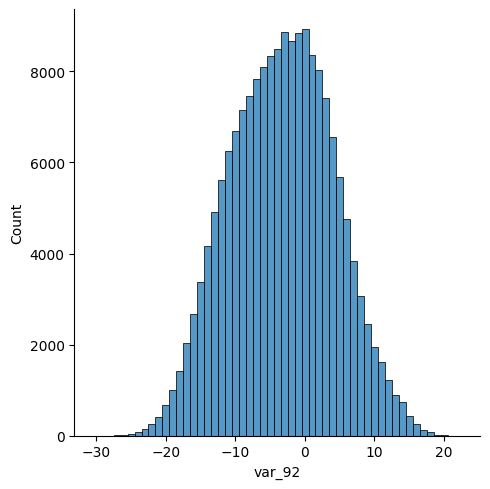

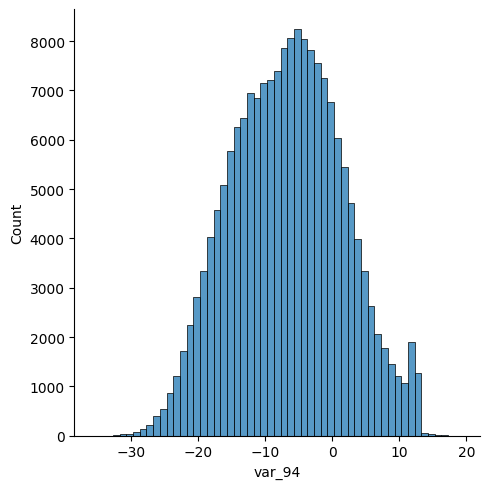

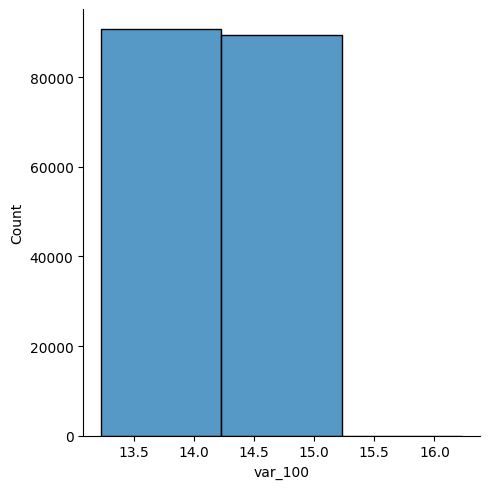

In [31]:

for column in train_test.columns:
    sns.displot(train_test, x=column, discrete=True)
    plt.show()

# Seaborn provides more advanced plotting functionalities.
# You can use displot() to create histograms and kernel density plots.
# You can use it to handle both numerical and categorical variables.
# discrete = True seems to have bins, while discrete = False looks like more data points

In [32]:
#8. Check the correlation values between all predictor columns to ensure there are no substantial correlations between predictors. This is important to support the decision to classify the ‘target’ using Naïve Bayes.
correlation_matrix = train_test.corr()
#print(correlation_matrix)

In [33]:
correlation_matrix.describe()

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.014638,0.020176,0.018612,0.019008,0.019827,0.018549,0.019994,0.019983,0.018586,0.018658,...,0.018761,0.018531,0.018552,0.020011,0.018814,0.018923,0.020224,0.020805,0.020274,0.018898
std,0.150502,0.140132,0.140408,0.140311,0.140154,0.140327,0.140215,0.140163,0.140486,0.140423,...,0.140385,0.140445,0.140330,0.140165,0.140483,0.140285,0.140244,0.140011,0.140131,0.140319
min,-0.080689,-0.007758,-0.051718,-0.046433,-0.006139,-0.041987,-0.008394,-0.007425,-0.057373,-0.054375,...,-0.052324,-0.053733,-0.042073,-0.005613,-0.063871,-0.042765,-0.009386,-0.005825,-0.005009,-0.047005
25%,-0.052021,-0.001732,-0.003268,-0.002509,-0.002779,-0.002719,-0.003383,-0.002638,-0.003705,-0.002678,...,-0.003113,-0.003830,-0.002469,-0.002938,-0.002719,-0.002175,-0.003395,-0.002359,-0.002451,-0.001739
50%,-0.041987,-0.000269,0.000379,-0.000108,-0.000539,-0.000412,-0.000483,-0.000504,-0.000018,-0.000732,...,0.000601,0.001237,0.000043,-0.000511,0.000186,0.000946,0.000119,0.000236,-0.000295,0.000851
75%,0.049494,0.002170,0.003207,0.003298,0.001435,0.002347,0.002959,0.002831,0.004332,0.003111,...,0.003446,0.003184,0.001813,0.001452,0.003696,0.002107,0.003256,0.003623,0.001810,0.002669
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
corrs_notones = correlation_matrix.corr() - np.eye(len(correlation_matrix.columns))

In [35]:
corrs_notones_desc = corrs_notones.describe()
corrs_notones_desc

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,-0.023564,-0.018922,-0.020006,-0.019633,-0.019264,-0.020111,-0.019144,-0.019097,-0.020048,-0.019943,...,-0.019848,-0.020105,-0.020111,-0.019120,-0.019733,-0.019715,-0.018970,-0.018213,-0.018872,-0.019730
std,0.107604,0.016388,0.017897,0.016488,0.015049,0.013993,0.018752,0.016623,0.021031,0.018663,...,0.017765,0.019166,0.014290,0.016673,0.021163,0.014413,0.020885,0.015141,0.016631,0.015827
min,-0.175821,-0.038295,-0.118086,-0.108317,-0.035510,-0.097537,-0.039631,-0.037237,-0.131584,-0.123430,...,-0.119135,-0.123328,-0.098186,-0.034334,-0.141883,-0.099267,-0.043943,-0.035120,-0.032645,-0.108029
25%,-0.118610,-0.025928,-0.029575,-0.028322,-0.026884,-0.027437,-0.029598,-0.027629,-0.030148,-0.028050,...,-0.029139,-0.030588,-0.026922,-0.027909,-0.029095,-0.025814,-0.030158,-0.027080,-0.027768,-0.026115
50%,-0.097537,-0.020944,-0.018009,-0.017162,-0.021611,-0.019490,-0.022566,-0.021992,-0.017716,-0.018009,...,-0.016287,-0.016460,-0.016028,-0.021969,-0.015265,-0.017585,-0.020011,-0.021542,-0.021740,-0.016698
75%,0.083887,-0.013916,-0.008138,-0.008159,-0.015339,-0.010535,-0.012055,-0.012512,-0.006125,-0.007858,...,-0.007648,-0.008145,-0.011901,-0.014829,-0.007081,-0.011706,-0.010967,-0.011976,-0.015126,-0.010067
max,0.120285,0.078153,0.001980,0.000000,0.069949,0.000000,0.092810,0.078455,0.003829,0.000926,...,0.000133,0.003847,0.000000,0.081683,0.004950,0.000000,0.106247,0.068421,0.083591,0.000000


In [36]:
#Looking for the max and min values of the transposed describe for the correlation matrix when removing 1:1 correlations from the diagonal
print(f'Max\n{corrs_notones_desc.T.max()}\n---\n Min\n{corrs_notones_desc.T.min()}')

Max
count    51.000000
mean     -0.018057
std       0.107604
min      -0.032645
25%      -0.024882
50%      -0.011833
75%       0.083887
max       0.120285
dtype: float64
---
 Min
count    51.000000
mean     -0.023564
std       0.013993
min      -0.175821
25%      -0.118610
50%      -0.097537
75%      -0.015339
max       0.000000
dtype: float64


In [37]:
print(f'Total Max {corrs_notones.max().max()}\nTotal Min {corrs_notones.min().min()}')

Total Max 0.12028500279332863
Total Min -0.1758210184838709


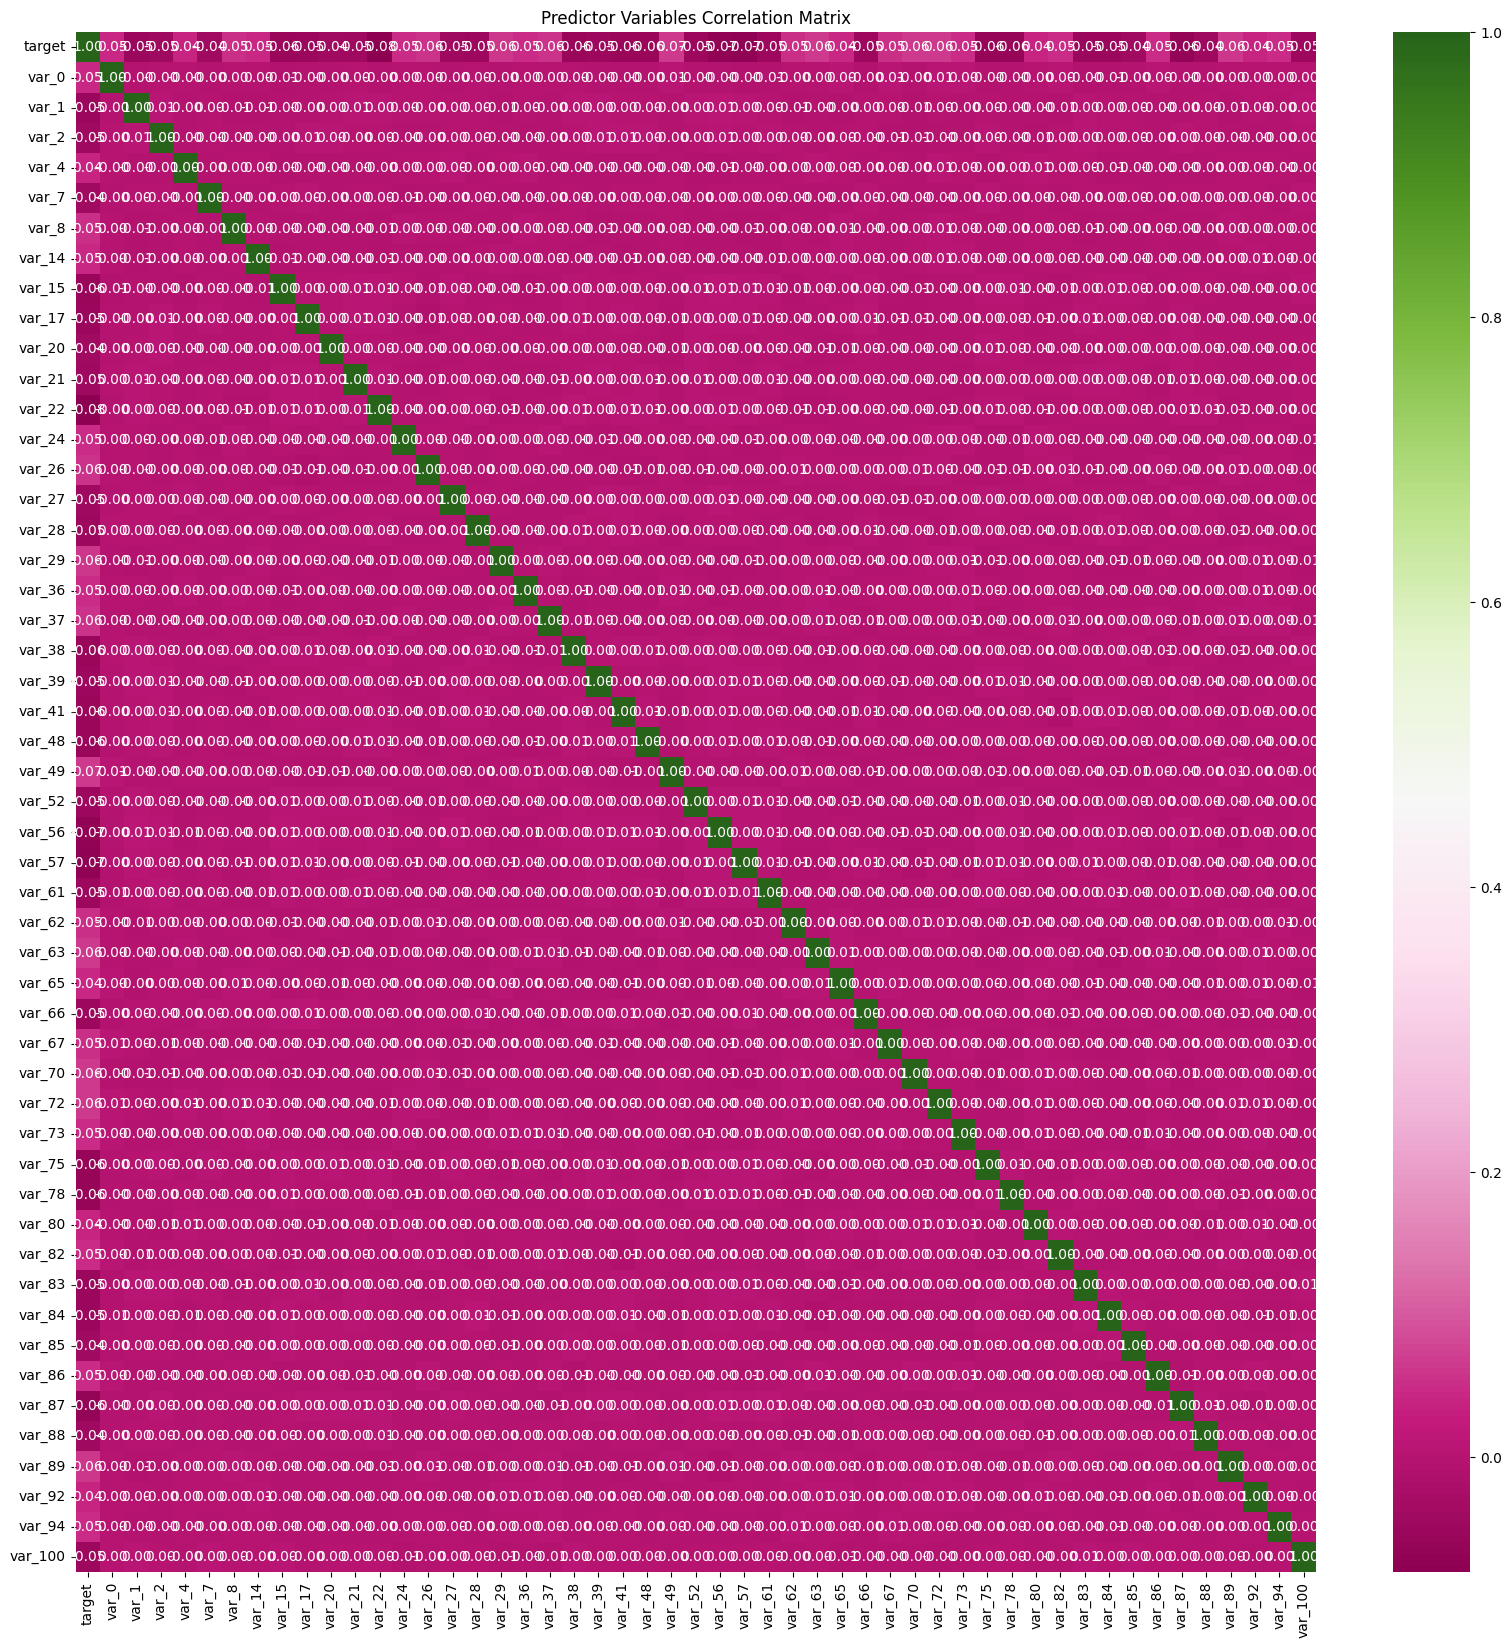

In [38]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title("Predictor Variables Correlation Matrix")
plt.show()

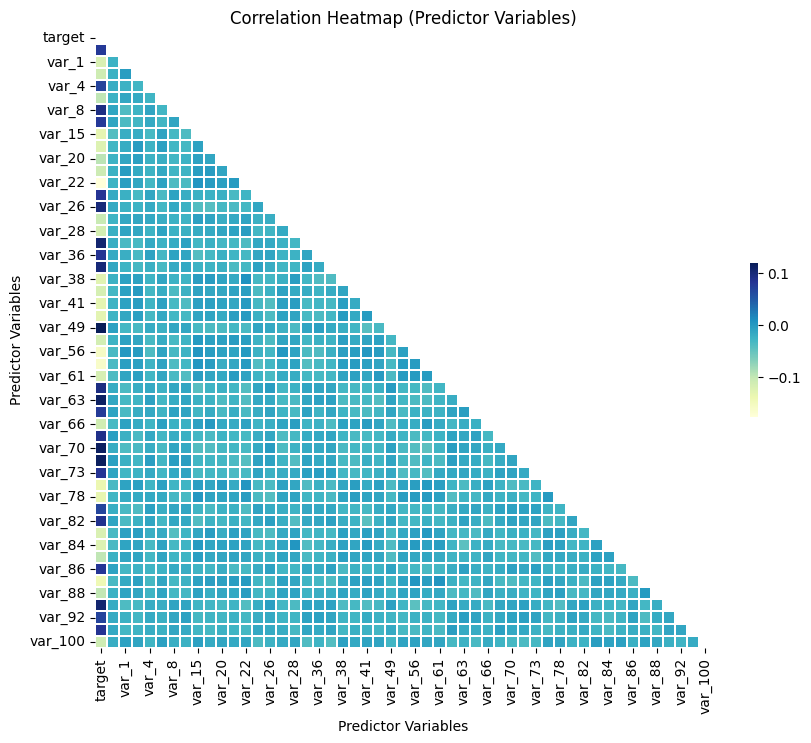

In [39]:
#Assisted by Gemini to figure out how to make the heatmap more paletteable (sic)
# Create a mask for the upper triangle
mask = np.zeros_like(corrs_notones, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Plot the heatmap
sns.heatmap(corrs_notones, mask=mask,
            cmap='YlGnBu',
            square=True,
            linewidths=0.25,
            cbar_kws={"shrink": 0.25},
            annot_kws={'size': 5},
            fmt=".2f",
            # vmin=-0.2, vmax=0.15,
            )

# Add title and labels
plt.title("Correlation Heatmap (Predictor Variables)")
plt.xlabel("Predictor Variables")
plt.ylabel("Predictor Variables")

plt.show()

In [40]:
#9. Create two data frames: one with all successful transactions, one with all unsuccessful transactions.
# Make sure they are copies and not slices.

In [41]:
filter1 = ( train_test['target'] == 1 )
print(filter1)
filter0 = ( train_test['target'] == 0 )
print(filter0)

3          False
5          False
11         False
15         False
19         False
           ...  
1049990    False
1049993    False
1049995     True
1049997    False
1049999    False
Name: target, Length: 180000, dtype: bool
3           True
5           True
11          True
15          True
19          True
           ...  
1049990     True
1049993     True
1049995    False
1049997     True
1049999     True
Name: target, Length: 180000, dtype: bool


In [42]:
#This assumes that successful and unsuccessful transactions are represented by 0 and 1 (ID unknown)
train_filter1 = train_test[filter1]
train_filter0 = train_test[filter0]

In [43]:
train_test

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,0.0,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,1.0,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,0.0,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


## Data Processing

10. Create two data frames: one with all the predictor columns (everything except for Unnamed: 0, ID_code and target) and one with just the target. Make sure they are copies and not slices.

1. Define a Gaussian Naïve Bayes model using Sklearn.

1. Divide the two data frames you created in step #10 into training and testing subsets.

1. Train the model using the training subset of the dataset.

1. Test the model using the testing subset of the dataset. Calculate and report the accuracy.

1. Perform a cross-validation loop to calculate the accuracy of your model. Report that accuracy. How does it compare to the accuracy you calculated in #14?

1. Plot a histogram of the accuracy scores you generated in your cross-validation loop. What do you notice about the distribution of accuracy scores?

1.  Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report). What do you notice?

1. The training data is very skewed towards non-successful transactions (about 90% of the training data has ‘target’==0). Remove enough non-successful transaction rows so that your remaining training data is 50%/50% split between successful and non-successful transactions. Hint: you can use the data frames you created in step #9.

1. Repeat the cross-validation process on this data set. Report what your cross-validation accuracy is in this 50/50 case.



In [44]:
##Data Processing
#The raw dataset was used without changes beyond dropping NaN values, with the exception of creating a balanced data set with equal parts of target values 0 and 1. Both original and balanced datasets were split into training and testing sets using train_test_split() to prepare for modeling.

In [45]:
# 10. Create two data frames: one with all the predictor columns (everything except for Unnamed: 0, ID_code and target) and one with just the target.
# Make sure they are copies and not slices.

In [46]:
#Create df w/ only target
train_target = train_test['target']

#create df w/ only vars
train_vars = train_test.drop('target', axis=1)
train_vars

,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,var_20,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,0.5878,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,6.5456,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,18.7893,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,1.1400,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,7.8002,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,3.1549,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,3.9661,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,3.8858,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,2.0014,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [47]:
#11. Define a Gaussian Naïve Bayes model using Sklearn.
model = GaussianNB()
model

GaussianNB()

In [48]:
#12. Divide the two data frames you created in step #10 into training and testing subsets.
vars_train, vars_test, target_train, target_test = train_test_split(train_vars, train_target, test_size=0.2, random_state=42)
print(f'{vars_train}\n, {vars_test}\n, {target_train}\n, {target_test}')

#checking to make sure there are 1s somewhere in the target dfs b/c preview was all 0s
target_train.describe()

         var_0    var_1    var_2   var_4    var_7   var_8   var_14  var_15  \
468272  7.2734  20.6994  22.2625  8.1372  -4.5094  7.1551  13.8276  3.1043   
129354  5.7791  15.6101  14.7862  1.7992  -2.9733  7.2658  19.2068  3.7205   
991950  5.6577  14.0907  13.0240 -8.1344   4.6055  7.4198  16.1766  3.3780   
648799  9.0457  15.0796  11.4242  4.1437  -6.1246  7.3125  18.2659  3.1866   
909705  8.1210  16.2385   6.2359  6.1633   1.1657  7.0560  10.6863  2.8005   
...        ...      ...      ...     ...      ...     ...      ...     ...   
701302  9.8583  16.1256  13.9567  4.8012  10.7445  7.0261  23.3793  3.2934   
606896  3.5295  12.3449  17.6113  2.9642  -2.8838  7.0540   0.0866  3.4011   
770511  8.9916  17.4320  12.5420  3.8263   7.3969  6.9306  11.6320  2.5175   
857107  8.0342  19.4433  11.4470  5.7017   2.0109  6.6008  24.1396  3.1009   
713143  3.0462  14.7168  17.6930 -5.8585   1.6584  6.7948  22.3373  3.3177   

         var_17   var_20  ...   var_83  var_84  var_85   var_86

,target
count,144000.000000
mean,0.100292
std,0.300390
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [49]:
#13. Train the model using the training subset of the dataset.
model.fit(vars_train, target_train)


GaussianNB()

In [50]:
#Titanic model trainX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# gnb.fit(X_train, y_train)
# y_pred = gnb.predict(X_test)
# print("Number of mislabeled points out of a total %d points : %d"
#       % (X_test.shape[0], (y_test != y_pred).sum()))

# print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}"


In [51]:
#14. Test the model using the testing subset of the dataset. Calculate and report the accuracy.
prediction = model.predict(vars_test)
prediction

model_accuracy = metrics.accuracy_score(target_test, prediction)
print(model_accuracy)

0.9109166666666667


In [52]:
#15. Perform a cross-validation loop to calculate the accuracy of your model.
# Report that accuracy. How does it compare to the accuracy you calculated in #14?

In [53]:
#Titanic Cross validation program
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [54]:
cross_valid_accuracy = cross_validate(train_vars, train_target, 100)

In [55]:
cross_valid_accuracy_array = pd.DataFrame(cross_valid_accuracy)
cross_valid_accuracy_array

,0
0,0.911139
1,0.913083
2,0.912028
3,0.911750
4,0.912611
...,...
95,0.914194
96,0.912472
97,0.911194
98,0.910667


In [56]:
cross_valid_accuracy.mean()

np.float64(0.9113836111111111)

In [57]:
loop_compare = abs(model_accuracy - cross_valid_accuracy.mean())/model_accuracy

In [58]:
#Accuracy comparison:
print(f'The accuracy of a single vs 100-looped prediction is within {loop_compare*100:.3f}%')

The accuracy of a single vs 100-looped prediction is within 0.051%


In [59]:
#16. Plot a histogram of the accuracy scores you generated in your cross-validation loop.
# What do you notice about the distribution of accuracy scores?

array([[<Axes: title={'center': '0'}>]], dtype=object)

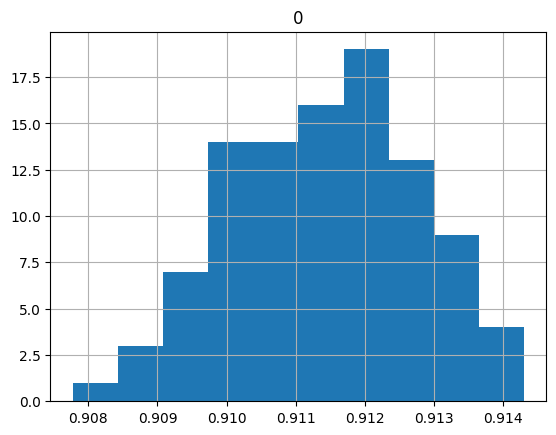

In [60]:
cross_valid_accuracy_array.hist()

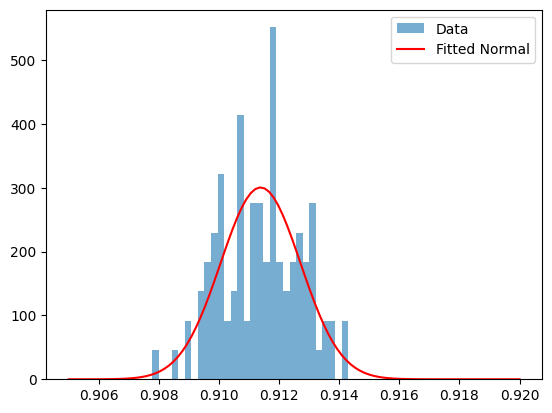

In [94]:
#Chrome Gemini recommendation for fitting data to distributions
# Normal distribution
# normal_dist = norm(loc=0, scale=1) # Mean 0, standard deviation 1
# x = np.linspace(-5, 5, 100)
# pdf = normal_dist.pdf(x) # Probability density function
# cdf = normal_dist.cdf(x) # Cumulative distribution function
# sample = normal_dist.rvs(size=100) # Generate 100 random samples

# # Poisson distribution
# poisson_dist = poisson(mu=3) # Mean 3
# k = np.arange(0, 10)
# pmf = poisson_dist.pmf(k) # Probability mass function
# cdf = poisson_dist.cdf(k) # Cumulative distribution function
# sample = poisson_dist.rvs(size=100) # Generate 100 random samples

#How to

# Fit normal distribution
params = stats.norm.fit(cross_valid_accuracy_array)
mean, std = params

# # Plot histogram and fitted distribution
plt.hist(cross_valid_accuracy_array, bins=30, density=True, alpha=0.6, label='Data')
x = np.linspace(0.905, 0.920, 100)
pdf = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf, 'r', label='Fitted Normal')
plt.legend()
plt.show()

In [62]:
# # Gemini also recommended Perform Kolmogorov-Smirnov test
# ks_statistic, p_value = stats.kstest(cross_valid_accuracy_array, 'norm', args=params)
# print(f"KS Statistic: {ks_statistic}, P-value: {p_value}")

In [63]:
#Observation of histogram
print('This histogram looks roughly like a Normal distribution, but skewed right; possibly Poisson')

This histogram looks roughly like a Normal distribution, but skewed right; possibly Poisson


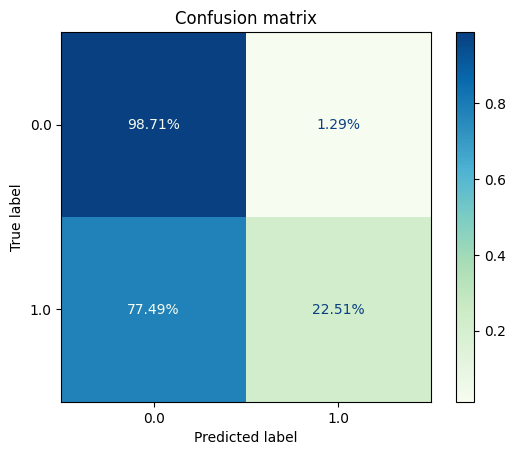

In [64]:
#Titanic confusion matrix
metrics.ConfusionMatrixDisplay.from_estimator(
    model,
    vars_test,
    target_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

In [65]:
#17. Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report).
print(metrics.classification_report(prediction,target_test))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     34771
         1.0       0.23      0.66      0.34      1229

    accuracy                           0.91     36000
   macro avg       0.61      0.79      0.64     36000
weighted avg       0.96      0.91      0.93     36000



In [66]:
#17.b. What do you notice?
print('Accuracy is highest for target == 0, as this is the bulk of the data; error is *significantly* higher for target == 1')

Accuracy is highest for target == 0, as this is the bulk of the data; error is *significantly* higher for target == 1


In [67]:
#18 The training data is very skewed towards non-successful transactions (about 90% of the training data has ‘target’==0).
# Remove enough non-successful transaction rows so that your remaining training data is 50%/50% split between successful and non-successful transactions.
# Hint: you can use the data frames you created in step #9.

In [68]:
# Step 9 review
# filter1 = ( train_test['target'] == 1 )
# print(filter1)
# filter0 = ( train_test['target'] == 0 )
# print(filter0)
# train_filter1 = train_test[filter1]
# train_filter0 = train_test[filter0]

In [69]:
np.shape(train_filter0)[0]

161960

In [70]:
np.shape(train_filter1)[0]

18040

In [71]:
balance_adjust = np.shape(train_filter0)[0] - np.shape(train_filter1)[0]
balance_adjust

143920

In [72]:
# #Gemini via Chrome recommends the following program to drop random rows
# def drop_random_rows(df, max_rows_to_drop):
#     """Drops a random number of rows from a DataFrame.

#     Args:
#         df (pd.DataFrame): The input DataFrame.
#         max_rows_to_drop (int): The maximum number of rows to drop.

#     Returns:
#         pd.DataFrame: The DataFrame with random rows dropped.

#     # Example usage
#       data = {'col1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#       'col2': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']}
#       df = pd.DataFrame(data)

#     df_dropped = drop_random_rows(df, 3) # Drop up to 3 rows
#     print(df_dropped)
#     """
#     num_rows_to_drop = random.randint(0, max_rows_to_drop)
#     if num_rows_to_drop > 0:
#       drop_indices = random.sample(df.index.tolist(), num_rows_to_drop)
#       df = df.drop(drop_indices)
#     return df
# #We can use this to build something more direct, but it was interesting so I kept it

In [73]:
np.shape(train_filter0.index.tolist())

(161960,)

In [74]:
#This drops n rows, where n is the positive difference between the target == 0 (majority) and target == 1 (minority) via random selection of rows with target == 0 to establish a balanced data set
drop_indices = random.sample(train_filter0.index.tolist(), balance_adjust)
train_filter0_balanced = train_filter0.drop(drop_indices)
np.shape(train_filter0_balanced)

(18040, 51)

In [75]:
np.shape(train_filter1)

(18040, 51)

In [76]:
balanced_concat = pd.concat([train_filter1, train_filter0_balanced])
np.shape(balanced_concat)

(36080, 51)

In [77]:
balanced_concat['target'].value_counts(dropna=False)

,count
target,
1.0,18040
0.0,18040


In [78]:
#19. Repeat the cross-validation process on this data set. Report what your cross-validation accuracy is in this 50/50 case.

In [79]:
#Target df w/ only target
train_target_bal = balanced_concat['target']
np.shape(train_target_bal)

(36080,)

In [80]:
#df w/ only vars
train_vars_bal = balanced_concat.drop('target', axis=1)
np.shape(train_vars_bal)

(36080, 50)

In [81]:
#Divide the two data frames created into training and testing subsets.
vars_train_bal, vars_test_bal, target_train_bal, target_test_bal = train_test_split(train_vars_bal, train_target_bal, test_size=0.2, random_state=42)
print(f'{vars_train_bal}\n, {vars_test_bal}\n, {target_train_bal}\n, {target_test_bal}')

          var_0    var_1    var_2    var_4   var_7   var_8   var_14  var_15  \
546016   4.2104  15.7356   8.0233  -5.8743 -1.6883  7.4718  22.9804  2.8772   
88301    5.9181  15.3846  19.6904  -4.4692 -7.4745  6.6686  14.8578  2.8226   
47119    4.9670  18.6952  14.6524   5.3828 -5.4012  6.7052  21.7502  2.7347   
813369   6.8058  18.7381  10.8224   8.9007  3.2500  7.2754  15.8703  3.5749   
707049   4.6600  17.9559  18.2386  -2.3989 -0.4484  6.3710   9.0054  3.0473   
...         ...      ...      ...      ...     ...     ...      ...     ...   
982037   7.4031  15.6064  15.9338  -2.2723 -0.4719  6.7134  16.2506  3.2597   
371066  13.0381  14.0511  13.5808  -0.9990  8.0521  6.7433  23.1050  3.3720   
659774   6.9531  14.5859  11.8094 -14.7805  3.9397  6.4752   8.9799  2.9281   
51448    9.2285  18.2407  18.0590  -3.3737 -0.6974  7.4243   7.9182  2.3676   
922945   3.9938  18.8688  12.7984   3.0651  8.8602  7.6515  14.8773  2.6785   

         var_17   var_20  ...   var_83  var_84  var

In [82]:
model_bal = GaussianNB()
model_bal

GaussianNB()

In [83]:
#Train the model using the training subset of the dataset.
model_bal.fit(vars_train_bal, target_train_bal)

GaussianNB()

In [84]:
#Test the model using the testing subset of the dataset. Calculate and report the accuracy.
prediction_bal = model.predict(vars_test_bal)
prediction_bal

array([0., 0., 0., ..., 0., 0., 0.])

In [85]:
model_accuracy_bal = metrics.accuracy_score(target_test_bal, prediction_bal)
print(model_accuracy_bal)

0.602549889135255


In [86]:
cross_valid_accuracy_bal = cross_validate(train_vars_bal, train_target_bal, 100)
cross_valid_accuracy_array_bal = pd.DataFrame(cross_valid_accuracy_bal)
cross_valid_accuracy_array_bal
cross_valid_accuracy_bal.mean()
loop_compare = abs(model_accuracy_bal - cross_valid_accuracy_bal.mean())/model_accuracy_bal
#Accuracy comparison:
print(f'The accuracy of a single vs 100-looped prediction is within {loop_compare*100:.3f}%')

The accuracy of a single vs 100-looped prediction is within 25.308%


array([[<Axes: title={'center': '0'}>]], dtype=object)

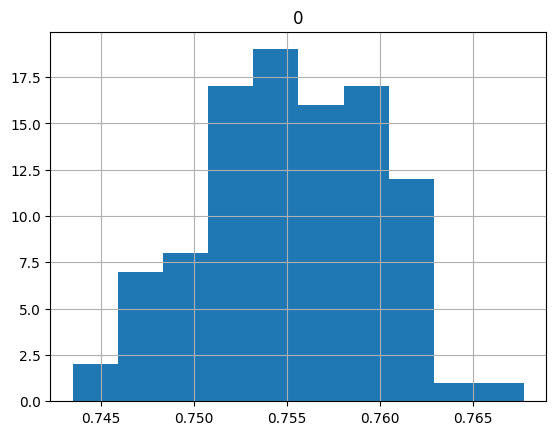

In [87]:
#Plot a histogram of the accuracy scores you generated in your cross-validation loop.
cross_valid_accuracy_array_bal.hist()

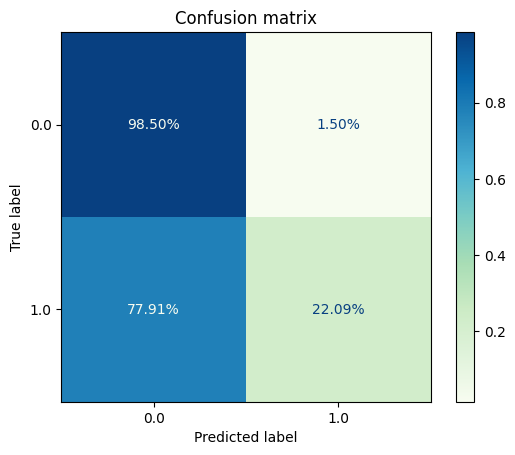

In [88]:
#Confusion matrix
metrics.ConfusionMatrixDisplay.from_estimator(
   model,
   vars_test_bal,
   target_test_bal,
   normalize = 'true',
   values_format = '.2%',
   cmap = 'GnBu',
   )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

In [89]:
#Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report).
print(metrics.classification_report(prediction_bal,target_test_bal))

              precision    recall  f1-score   support

         0.0       0.99      0.56      0.71      6364
         1.0       0.22      0.94      0.36       852

    accuracy                           0.60      7216
   macro avg       0.60      0.75      0.53      7216
weighted avg       0.89      0.60      0.67      7216



## Data Visualization


20. Compare the results of your cross-validation with the whole training data and the reduced 50/50 training data

1. Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report)




In [90]:
##Data Visualization/Communicate Results
#Histograms, heatmaps, and confusion matrices were utilized to help us understand the data and to evaluate model performance. These data visualizations made it easier to identify patterns and communicate results.

In [91]:
#20. Compare the results of your cross-validation with the whole training data and the reduced 50/50 training data
print('The Accuracy across both target conditions is much more balanced, although it did lose some predictive value for the 0 condition compated to the saturated/imbalanced original dataset')

The Accuracy across both target conditions is much more balanced, although it did lose some predictive value for the 0 condition compated to the saturated/imbalanced original dataset


In [92]:
print(metrics.classification_report(prediction,target_test))
print(metrics.classification_report(prediction_bal,target_test_bal))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     34771
         1.0       0.23      0.66      0.34      1229

    accuracy                           0.91     36000
   macro avg       0.61      0.79      0.64     36000
weighted avg       0.96      0.91      0.93     36000

              precision    recall  f1-score   support

         0.0       0.99      0.56      0.71      6364
         1.0       0.22      0.94      0.36       852

    accuracy                           0.60      7216
   macro avg       0.60      0.75      0.53      7216
weighted avg       0.89      0.60      0.67      7216



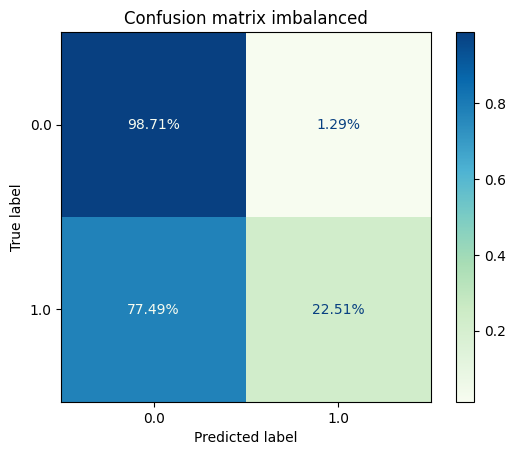

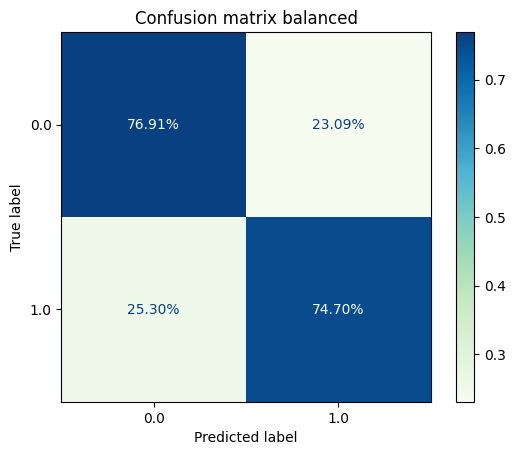

In [93]:
metrics.ConfusionMatrixDisplay.from_estimator(
   model,
   vars_test,
   target_test,
   normalize = 'true',
   values_format = '.2%',
   cmap = 'GnBu',
   )
plt.grid(False)
plt.title('Confusion matrix imbalanced') ;
plt.savefig('confusion_matrix_imbalanced.png')

metrics.ConfusionMatrixDisplay.from_estimator(
   model_bal,
   vars_test_bal,
   target_test_bal,
   normalize = 'true',
   values_format = '.2%',
   cmap = 'GnBu',
   )
plt.grid(False)
plt.title('Confusion matrix balanced') ;
plt.savefig('confusion_matrix_balanced.png')

## Communicate the Results

22. Communicate the results of your analysis.



## Submit Final Project

23. Upload your finished Jupyter notebook to your Project 1 student folder.
